# Introduction

Stroke is a severe cerebrovascular disease caused by an interruption of blood flow from and to the brain. As a direct consequence of this interruption, the brain is not able to receive oxygen and nutrients for its correct functioning. The other way around, the brain is not able to drain and expel through blood vessels all of its waste, like dead cells. In a question of minutes, the brain is in a critical condition as brain cells will imminently begin to die. The American Stroke Association indicates that stroke is the fifth cause of death and disability in the United States. For this reason, stroke is considered a severe disease and has been the subject of extensive research, not only in the medical field but also in data science and machine learning studies.

Dataset Description



The dataset used in this article contains 5110 records of patients. Each patient has 12 columns each referring to a concrete attribute. Most of these attributes correspond to medical records or the results of clinical trials. Some of the key attributes are hypertension, heart diseases, average glucose levels in the blood, and body mass index (BMI). As we can observe from these first attributes, the dataset provides relevant data regarding the likelihood of patients suffering from stroke disease. It is easy to understand that a patient with high glucose levels and BMI, who has suffered from heart diseases and/or hypertension, is more likely to suffer from stroke. In fact, stroke is also an attribute in the dataset and indicates in each medical record if the patient suffered from a stroke disease or not.

Data Dictionary - a)Id - Unique Id b)gender c)age d)hypertension - Binary Feature e)Heart_disease - Binary Feature f)Ever_married - Has the patient ever been married g)Work_type - Work type of a patient h)Residency_type - Residency type of patient i)avg_glucose_level - Average Glucose level in the blood j)bmi - Body mass Index k)smoking_status - Smoking status of the patient l)stroke - stroke event

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Project 1\\healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isnull().sum()    # null value

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


treat null values

In [7]:
df['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [8]:
df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [9]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Exploratory Data analysis

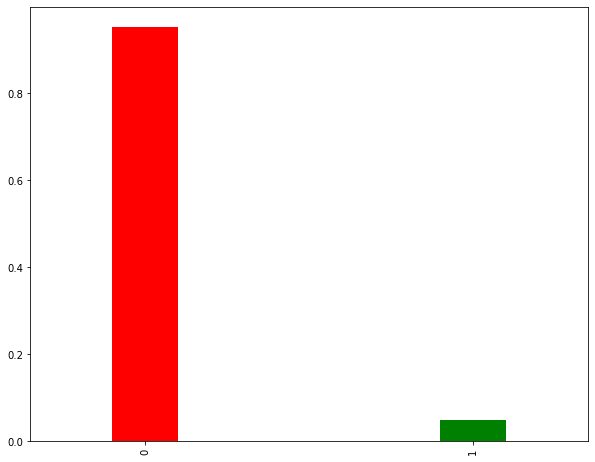

In [11]:
fig,axes=plt.subplots(figsize=(10,8))
df['stroke'].value_counts(normalize=True).plot.bar(width=0.2,color=('red','green'))

plt.show()

# categorical columns

In [12]:
df.gender.value_counts()


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

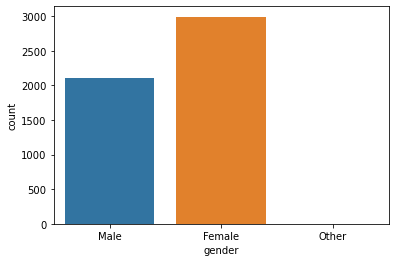

In [13]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='ever_married', ylabel='count'>

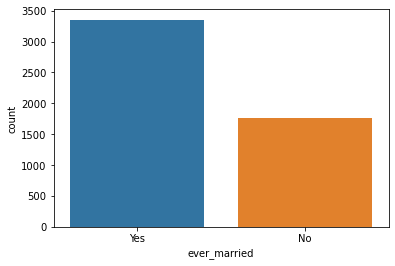

In [14]:
sns.countplot(df['ever_married'])


<AxesSubplot:xlabel='work_type', ylabel='count'>

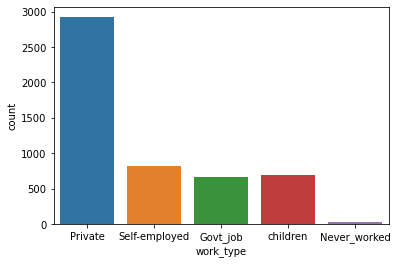

In [15]:
sns.countplot(df['work_type'])

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

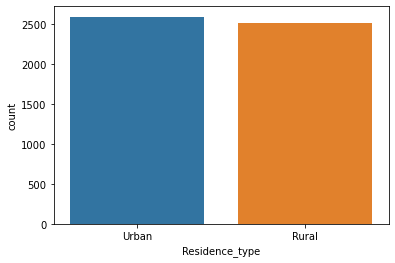

In [16]:
sns.countplot(df['Residence_type'])

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

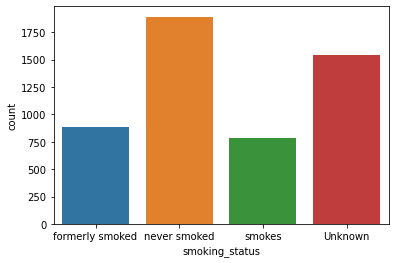

In [17]:
sns.countplot(df['smoking_status'])

In [18]:
# relation between categorical column and target columns

In [19]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type','smoking_status']


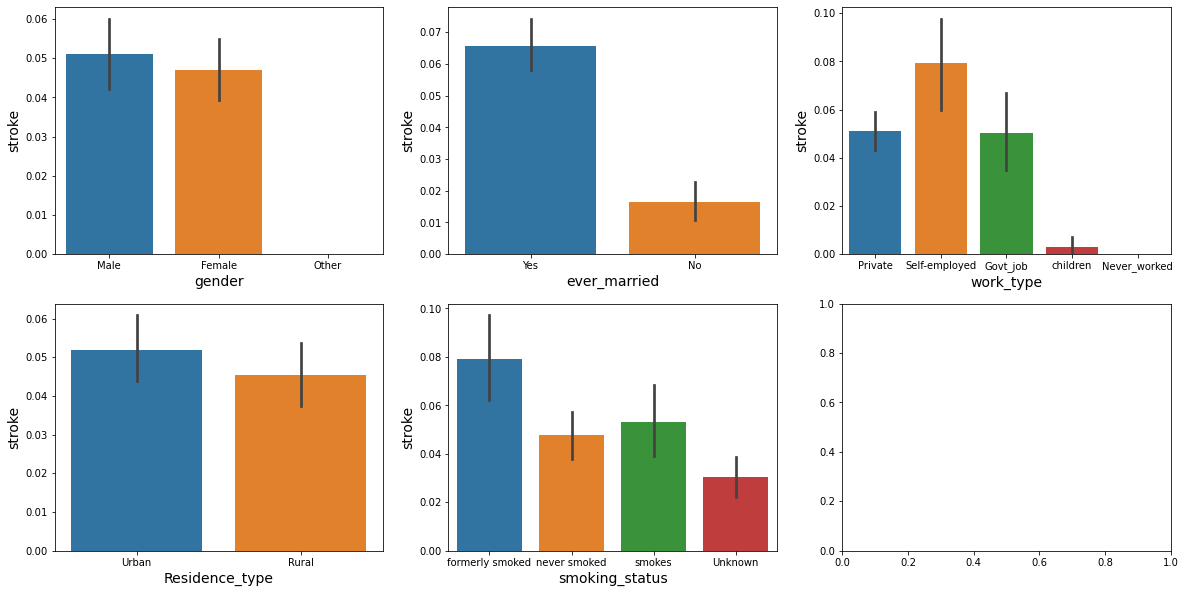

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(df[c], df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)

plt.show()

<AxesSubplot:>

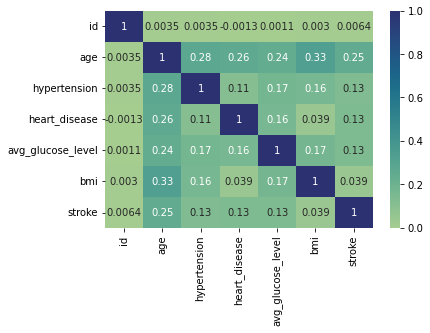

In [21]:
# Correlation heatmap
sns.heatmap(df.corr(), annot = True, cmap = 'crest')

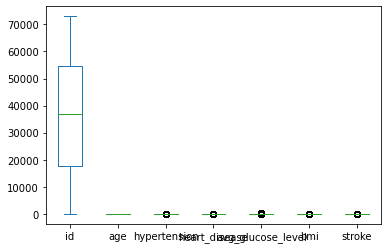

In [22]:
#checking outliers
df.plot(kind='box')
plt.show()

In [23]:
df.drop('id',axis=1,inplace=True)

Label Encoding

In [24]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [25]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


In [26]:
gender=enc.fit_transform(df['gender'])
smoking_status=enc.fit_transform(df['smoking_status'])
work_type=enc.fit_transform(df['work_type'])
Residence_type=enc.fit_transform(df['Residence_type'])
ever_married=enc.fit_transform(df['ever_married'])


In [27]:
df['work_type']=work_type
df['ever_married']=ever_married
df['Residence_type']=Residence_type
df['smoking_status']=smoking_status
df['gender']=gender

In [28]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [29]:
from imblearn.over_sampling import SMOTE
X, y = df.iloc[:, 0:-1], df.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

print("After Oversampling, the counts of label 1: ", y.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y.value_counts()[0])

Before Oversampling, the counts of label 1:  249
Before Oversampling, the counts of label 0:  4861
After Oversampling, the counts of label 1:  4861
After Oversampling, the counts of label 0:  4861


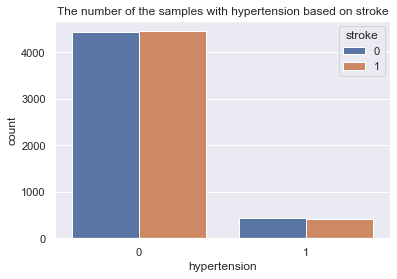

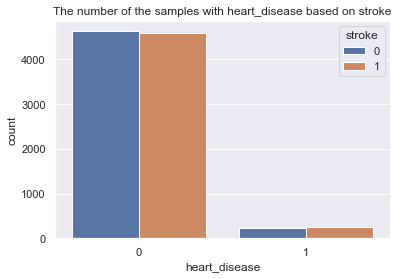

In [30]:
# visualization after SMOTE
df_as = pd.concat([X, y], axis = 1)

# a short look into the number of each categorical features grouped by stroke variable.
sns.set_theme(style = 'darkgrid')
for i in df_as.columns[:-1]:  # exclude stroke column
    if (df_as[i].dtype == 'object') or (df_as[i].dtype == 'int64'):
            sns.countplot(data = df_as, x = i, hue = 'stroke')
            plt.title('The number of the samples with {} based on stroke'.format(i))
            plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Splitting the data for train and test

In [32]:
X=df.drop('stroke',axis=1)
y=df['stroke']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3897,1,4.00,0,0,0,4,0,90.42,16.2,0
576,1,29.00,0,0,0,2,1,207.58,22.8,3
4013,1,44.00,1,0,1,2,0,91.28,26.5,2
4536,0,68.00,1,0,1,2,1,150.74,40.3,0
1180,0,62.00,0,0,1,2,0,82.57,36.0,1
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


In [35]:
y_train

3897    0
576     0
4013    0
4536    0
1180    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3577, dtype: int64

In [36]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
4688,1,31.0,0,0,0,3,0,64.85,23.0,0
4478,1,40.0,0,0,1,3,0,65.29,28.3,2
3849,0,8.0,0,0,0,4,1,74.42,22.5,0
4355,0,79.0,1,0,1,3,0,76.64,19.5,2
3826,0,75.0,0,0,1,0,0,94.77,27.2,2
...,...,...,...,...,...,...,...,...,...,...
818,1,20.0,0,0,0,0,0,106.97,27.9,1
4829,1,66.0,0,0,1,2,0,67.92,31.1,1
611,1,42.0,0,0,1,0,1,93.79,27.2,2
3082,0,57.0,0,0,1,2,0,69.40,24.0,0


In [37]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
818     0
4829    0
611     0
3082    0
3407    0
Name: stroke, Length: 1533, dtype: int64

Normalize

In [38]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [39]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()


In [40]:
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

In [41]:
X_train

array([[ 1.18418048, -1.7467638 , -0.31719928, ..., -0.340693  ,
        -1.65003512, -1.29622579],
       [ 1.18418048, -0.63635252, -0.31719928, ...,  2.26654137,
        -0.79238754,  1.52066342],
       [ 1.18418048,  0.02989425,  3.15259225, ..., -0.32155489,
        -0.31158512,  0.58170035],
       ...,
       [-0.84446587, -1.87290652, -0.31719928, ..., -0.18803315,
        -1.44212056, -1.29622579],
       [ 1.18418048,  1.62888649, -0.31719928, ...,  2.01062472,
         0.27317459, -0.35726272],
       [-0.84446587,  0.11872715, -0.31719928, ..., -0.12416526,
         2.78114402,  1.52066342]])

In [42]:
X_test

array([[ 1.18418048, -0.54751962, -0.31719928, ..., -0.90971812,
        -0.76639822, -1.29622579],
       [ 1.18418048, -0.14777156, -0.31719928, ..., -0.89992653,
        -0.07768123,  0.58170035],
       [-0.84446587, -1.569098  , -0.31719928, ..., -0.69675096,
        -0.83137152, -1.29622579],
       ...,
       [ 1.18418048, -0.05893866, -0.31719928, ..., -0.26569829,
        -0.22062249,  0.58170035],
       [-0.84446587,  0.60730811, -0.31719928, ..., -0.80846414,
        -0.63645162, -1.29622579],
       [-0.84446587,  0.74055746, -0.31719928, ..., -0.72746095,
        -0.46752104,  0.58170035]])

# Models to be used for ML

Model:  Logistic Regression
Validation Accuracy:  0.9419439008480104
Training Accuracy:  0.9552697791445345


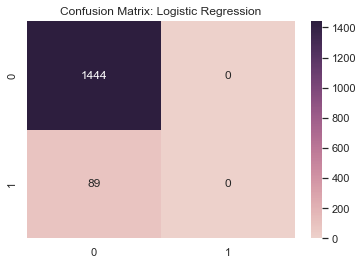

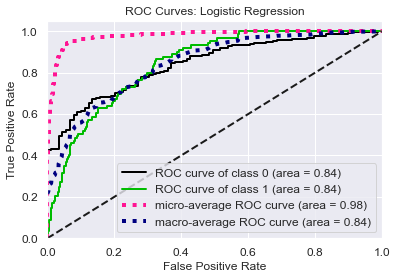

Model:  Decision Tree Classifier
Validation Accuracy:  0.9041095890410958
Training Accuracy:  1.0


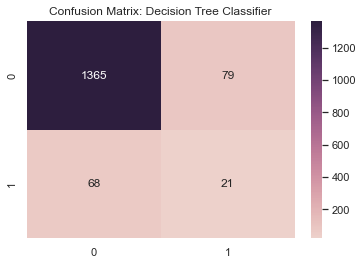

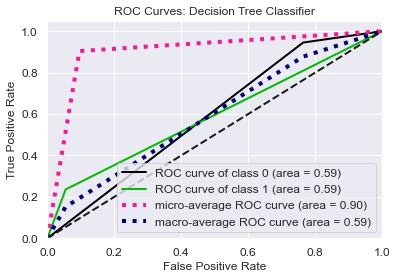

Model:  Random Forest
Validation Accuracy:  0.9419439008480104
Training Accuracy:  1.0


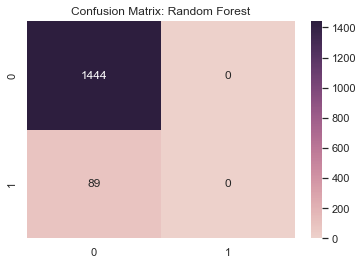

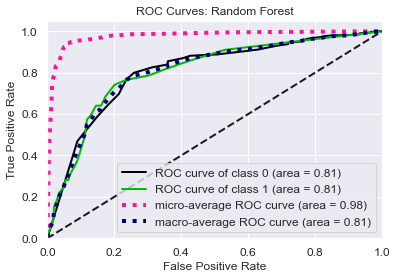

Model:  Ada Boost
Validation Accuracy:  0.9393346379647749
Training Accuracy:  0.9549902152641878


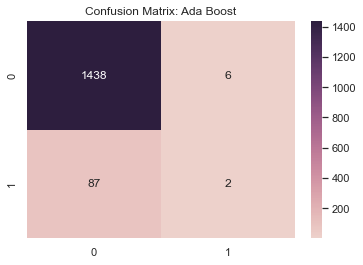

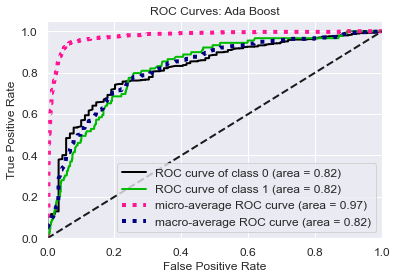

Model:  KNN
Validation Accuracy:  0.9406392694063926
Training Accuracy:  0.9575062901873078


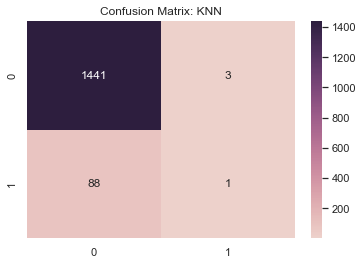

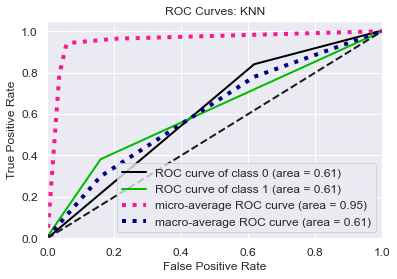

Model:  XG Boost
Validation Accuracy:  0.9412915851272016
Training Accuracy:  1.0


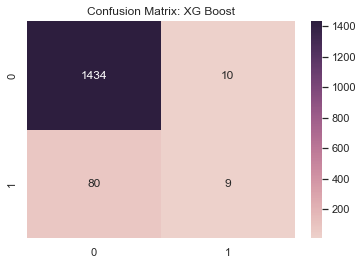

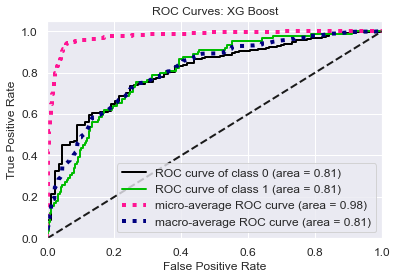

In [43]:

models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Ada Boost', AdaBoostClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('XG Boost', XGBClassifier())]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

# Hyperparameter Tuning

In [44]:
grid_models = [(LogisticRegression(),[{'C' : [0.3, 0.7, 1], 'random_state' : [42]}]),
               (DecisionTreeClassifier(),[{'criterion' : ['gini','entropy'], 'random_state' : [42]}]),
               (RandomForestClassifier(),[{'n_estimators' : [100, 200, 300], 'criterion' : ['gini','entropy'], 'random_state' : [42]}]),
               (AdaBoostClassifier(),[{'n_estimators' : [50, 100, 150], 'random_state' : [42]}]),
               (KNeighborsClassifier(),[{'n_neighbors' : [4, 6, 8, 10], 'metric' : ['euclidean', 'manhattan', 'chebyshev','minkowski']}]),
               (XGBClassifier(),[{'max_depth' : [3, 5, 7], 'min_child_weight' : [1, 3, 5]}])]

In [45]:
for model, param_grid  in grid_models:
    cv = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = 5)
    cv.fit(X_train, y_train)
    best_accuracy = cv.best_score_
    best_params = cv.best_params_
    print('{}: \nBest Accuracy: {:.2f}%'.format(model, best_accuracy*100))
    print('Best Parameters: ',best_params)
    print('******************************')

LogisticRegression(): 
Best Accuracy: 95.53%
Best Parameters:  {'C': 0.3, 'random_state': 42}
******************************
DecisionTreeClassifier(): 
Best Accuracy: 91.92%
Best Parameters:  {'criterion': 'entropy', 'random_state': 42}
******************************
RandomForestClassifier(): 
Best Accuracy: 95.55%
Best Parameters:  {'criterion': 'entropy', 'n_estimators': 300, 'random_state': 42}
******************************
AdaBoostClassifier(): 
Best Accuracy: 95.36%
Best Parameters:  {'n_estimators': 100, 'random_state': 42}
******************************
KNeighborsClassifier(): 
Best Accuracy: 95.55%
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 4}
******************************
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_polic

As results we can easily determine that the random forest and XG boost  algorithms give best scores after tuning.

Model:  Random Forest
Validation Accuracy:  0.9406392694063926
Training Accuracy:  1.0


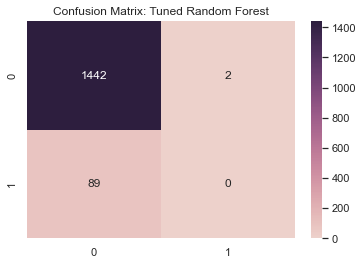

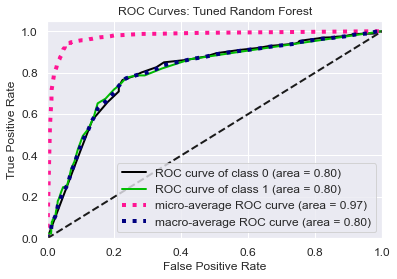

Feature: 0, Score: 0.03399
Feature: 1, Score: 0.23472
Feature: 2, Score: 0.02347
Feature: 3, Score: 0.02496
Feature: 4, Score: 0.02196
Feature: 5, Score: 0.04799
Feature: 6, Score: 0.03405
Feature: 7, Score: 0.27527
Feature: 8, Score: 0.23272
Feature: 9, Score: 0.07086


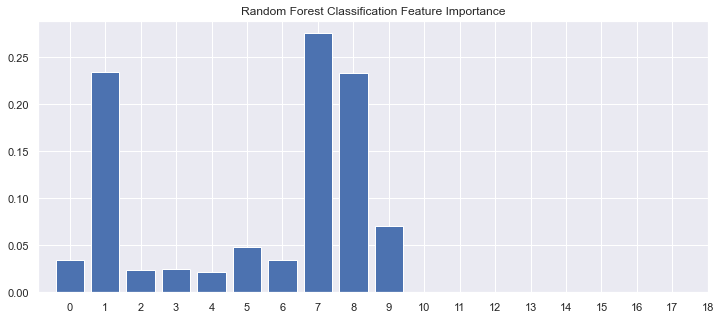


#######################################################
#######################################################

Model:  XG Boost
Validation Accuracy:  0.9380300065231572
Training Accuracy:  1.0


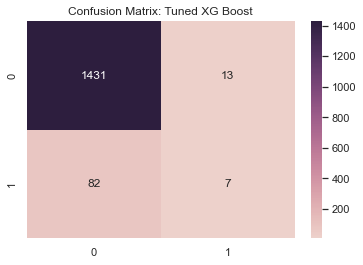

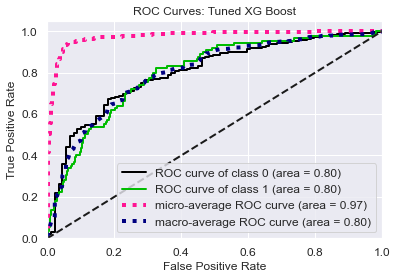

Feature: 0, Score: 0.09095
Feature: 1, Score: 0.15602
Feature: 2, Score: 0.10628
Feature: 3, Score: 0.11121
Feature: 4, Score: 0.11138
Feature: 5, Score: 0.08533
Feature: 6, Score: 0.07427
Feature: 7, Score: 0.08792
Feature: 8, Score: 0.09513
Feature: 9, Score: 0.08151


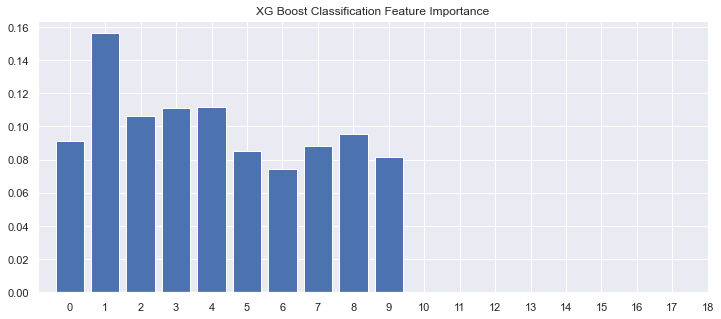


#######################################################
#######################################################



In [46]:
# The best two models with the best chosen parameters after tuning
models = [('Random Forest', RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state = 42)),
          ('XG Boost', XGBClassifier(max_depth = 7, min_child_weight = 1))]

models_score = []
for name, model in models:
    model = model
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    plt.title('Confusion Matrix: Tuned {}'.format(name))
    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: Tuned {}'.format(name))
    plt.show()
    
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    plt.figure(figsize = (12, 5))
    plt.bar([x for x in range(len(importance))], importance)
    plt.title("{} Classification Feature Importance".format(name))
    plt.xticks(range(0, 19))
    plt.show()
    print('')
    print('#######################################################')
    print('#######################################################')
    print('')